In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_cendus_poi = pd.read_pickle('../clean_pickles/target_cendus_poi.pk')
df_cendus_poi_sub = pd.read_pickle('../clean_pickles/target_cendus_poi_sub.pk')
df_dianping_poi = pd.read_pickle('../clean_pickles/target_dianping_poi.pk')
df_dianping_poi_cat = pd.read_pickle('../clean_pickles/target_dianping_poi_cat.pk')
df_mobike = pd.read_pickle('../clean_pickles/target_mobike.pk')
df_mobike_byhours = pd.read_pickle('../clean_pickles/target_mobike_byhours.pk')
df_re = pd.read_pickle('../clean_pickles/target_real_estate.pk')
df_taxi = pd.read_pickle('../clean_pickles/target_taxi_speed.pk')
df_weibo = pd.read_pickle('../clean_pickles/target_weibo.pk')

In [3]:
df_pred = df_cendus_poi.iloc[:,9:len(df_cendus_poi.columns)]
df_pred = df_pred.join(df_cendus_poi_sub.iloc[:,9:len(df_cendus_poi_sub.columns)], rsuffix='_sub')
df_pred = df_pred.join(df_dianping_poi.iloc[:,9:len(df_dianping_poi.columns)])
df_pred = df_pred.join(df_dianping_poi_cat.iloc[:,9:len(df_dianping_poi_cat.columns)])
df_pred = df_pred.join(df_mobike.iloc[:,9:len(df_mobike.columns)])
df_pred = df_pred.join(df_mobike_byhours.iloc[:,9:len(df_mobike_byhours.columns)])
df_pred = df_pred.join(df_re.iloc[:,9:len(df_re.columns)])
df_pred = df_pred.join(df_taxi.iloc[:,9:len(df_taxi.columns)])
df_pred = df_pred.join(df_weibo.iloc[:,9:len(df_weibo.columns)])

### Number of criterias

In [4]:
len(df_pred.columns)

149

In [5]:
def cleanCriteriasNoiseSmell(df):
    droppingColumns = []
    nb0 = df.iloc[:,len(df.columns)-1].value_counts()[0]
    nb1 = df.iloc[:,len(df.columns)-1].value_counts()[1]
    ratio = nb1 / nb0
    counter = 0
    for i in range(0,len(df.columns)-1):
        # 10 NA max to remove a maximum of 3 % of the points
        if len(df[df.iloc[:,i].isna()]) > 10:
            nbi0 = df[df.iloc[:,i].isna()].iloc[:,len(df.columns)-1].value_counts()[0]
            try:
                nbi1 = df[df.iloc[:,i].isna()].iloc[:,len(df.columns)-1].value_counts()[1]
            except KeyError:
                nbi1 = 0
            #if the proportion of the class is kept then we keep the criterion
            if (nbi1/nbi0) > ratio:
                droppingColumns.append(df.iloc[:,i].name)
                counter +=1
                print(df.iloc[:,i].name,  len(df[df.iloc[:,i].isna()]))
    print(counter)
    return df.drop(columns=droppingColumns)
    

In [6]:
def cleanCriteriasClean(df):
    droppingColumns = []
    nb1 = df.iloc[:,len(df.columns)-1].value_counts()[1]
    nb2 = df.iloc[:,len(df.columns)-1].value_counts()[2]
    nb3 = df.iloc[:,len(df.columns)-1].value_counts()[3]
    nb4 = df.iloc[:,len(df.columns)-1].value_counts()[4]
    ratio = (nb1+nb4) / (nb2+nb3)
    counter = 0
    for i in range(0,len(df.columns)-1):
        # 10 NA max to remove a maximum of 3 % of the points
        if len(df[df.iloc[:,i].isna()]) > 10:
            try:
                nbi1 = df[df.iloc[:,i].isna()].iloc[:,len(df.columns)-1].value_counts()[1]
            except KeyError:
                nbi1 = 0
            try:
                nbi2 = df[df.iloc[:,i].isna()].iloc[:,len(df.columns)-1].value_counts()[2]
            except KeyError:
                nbi2 = 0
            try:
                nbi3 = df[df.iloc[:,i].isna()].iloc[:,len(df.columns)-1].value_counts()[3]
            except KeyError:
                nbi3 = 0
            try:
                nbi4 = df[df.iloc[:,i].isna()].iloc[:,len(df.columns)-1].value_counts()[4]
            except KeyError:
                nbi4 = 0
            #if the proportion of the class is kept then we keep the criterion
            if ( (nbi1+nbi4)/(nbi2+nbi3) ) > ratio:
                droppingColumns.append(df.iloc[:,i].name)
                counter +=1
                print(df.iloc[:,i].name,  len(df[df.iloc[:,i].isna()]))
    print(counter)
    return df.drop(columns=droppingColumns)

We display the criteria that have been removed

In [7]:
df_pred = df_pred.join(df_cendus_poi['clean'])
df_pred = df_pred.dropna(subset=['clean'])
df_pred = cleanCriteriasClean(df_pred)
df_pred = df_pred.join(df_cendus_poi['noise'])
df_pred = df_pred.dropna(subset=['noise'])
#df_pred = cleanCriteriasNoiseSmell(df_pred)
df_pred = df_pred.join(df_cendus_poi['smell'])
df_pred = df_pred.dropna(subset=['smell'])
#df_pred = cleanCriteriasNoiseSmell(df_pred)
df_pred = df_pred.dropna()
df_pred = df_pred.sample(n=len(df_pred), random_state=3)

av_price_dianping 18
av_decoration_score_dianping 19
av_product_score_dianping 19
av_service_score_dianping 19
av_mobike_duration 47
av_mobike_distance 47
av_mobike_speed 47
av_friends_count_weibo 68
av_followers_count_weibo 68
av_status_count_weibo 68
av_total_checkin_count_weibo 68
av_tip_count_weibo 68
12


Creation of a target prediction wellbeing

In [8]:
df_pred['wellbeing'] = ''

In [9]:
for index, value in df_pred.iterrows():
    if value.clean > 2:
        df_pred['wellbeing'].loc[index] += '0'
    else:
        df_pred['wellbeing'].loc[index] += '1'
    df_pred['wellbeing'].loc[index] += str(value.noise).split('.')[0]
    df_pred['wellbeing'].loc[index] += str(value.smell).split('.')[0]

C:\Users\Roger\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [10]:
df_pred.wellbeing.value_counts()

000    159
100    120
110     41
010     29
101     10
001      3
011      2
111      1
Name: wellbeing, dtype: int64

In [11]:
df_pred_wellbeing = df_pred.drop(columns=['clean','noise','smell'])

# Prediction

## Wellbeing

In [12]:
X = df_pred_wellbeing.iloc[:,0:len(df_pred_wellbeing.columns)-1].copy()
Y = df_pred_wellbeing['wellbeing'].copy()

In [13]:
Y.value_counts()

000    159
100    120
110     41
010     29
101     10
001      3
011      2
111      1
Name: wellbeing, dtype: int64

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.33, shuffle=True)

In [15]:
from sklearn.model_selection import cross_val_score
from sklearn import tree

In [16]:
clf = tree.DecisionTreeClassifier(max_depth=3)
scores = cross_val_score(clf, X, Y, cv=5)
np.mean(scores)

C:\Users\Roger\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


0.3835616438356164

In [17]:
from sklearn.model_selection import GridSearchCV
param_grid = {'max_depth': [2,3,4,6,8,10,20]}
search = GridSearchCV(tree.DecisionTreeClassifier(), param_grid, cv=5)
search.fit(X,Y)
search.best_params_

C:\Users\Roger\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


{'max_depth': 4}

In [18]:
clf = tree.DecisionTreeClassifier(max_depth=4)
scores = cross_val_score(clf, X, Y, cv=5)
np.mean(scores)

C:\Users\Roger\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


0.42191780821917807

In [19]:
clf = tree.DecisionTreeClassifier(max_depth=4)
clf = clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_val)
np.mean(Y_pred == Y_val)

0.4132231404958678

In [20]:
from sklearn.metrics import f1_score
f1_score(Y_val, Y_pred, average='weighted')

0.33511553381683257

In [21]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_val, Y_pred)

array([[41,  0,  0,  0,  8,  0,  2],
       [ 1,  0,  0,  0,  0,  0,  0],
       [ 8,  0,  0,  0,  2,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0],
       [34,  0,  0,  0,  8,  0,  0],
       [ 4,  0,  0,  0,  0,  0,  0],
       [ 8,  0,  0,  0,  3,  0,  1]], dtype=int64)

In [22]:
Y_val.value_counts()

000    51
100    42
110    12
010    10
101     4
011     1
001     1
Name: wellbeing, dtype: int64

In [23]:
pd.Series(Y_pred).value_counts()

000    96
100    22
110     3
dtype: int64

- The model only predict 4 class on 7
- And it predict a lot the class '100' (85 times) but it has been correct only 27 times

[Text(418.5, 453.0, 'X[1] <= 0.0\ngini = 0.682\nsamples = 365\nvalue = [159, 3, 29, 2, 120, 10, 41, 1]'),
 Text(209.25, 271.8, 'X[15] <= 0.0\ngini = 0.707\nsamples = 186\nvalue = [84, 3, 20, 2, 43, 5, 28, 1]'),
 Text(104.625, 90.59999999999997, 'gini = 0.603\nsamples = 92\nvalue = [53, 1, 9, 1, 21, 2, 5, 0]'),
 Text(313.875, 90.59999999999997, 'gini = 0.761\nsamples = 94\nvalue = [31, 2, 11, 1, 22, 3, 23, 1]'),
 Text(627.75, 271.8, 'X[74] <= 0.0\ngini = 0.631\nsamples = 179\nvalue = [75, 0, 9, 0, 77, 5, 13, 0]'),
 Text(523.125, 90.59999999999997, 'gini = 0.617\nsamples = 146\nvalue = [53, 0, 6, 0, 72, 5, 10, 0]'),
 Text(732.375, 90.59999999999997, 'gini = 0.516\nsamples = 33\nvalue = [22, 0, 3, 0, 5, 0, 3, 0]')]

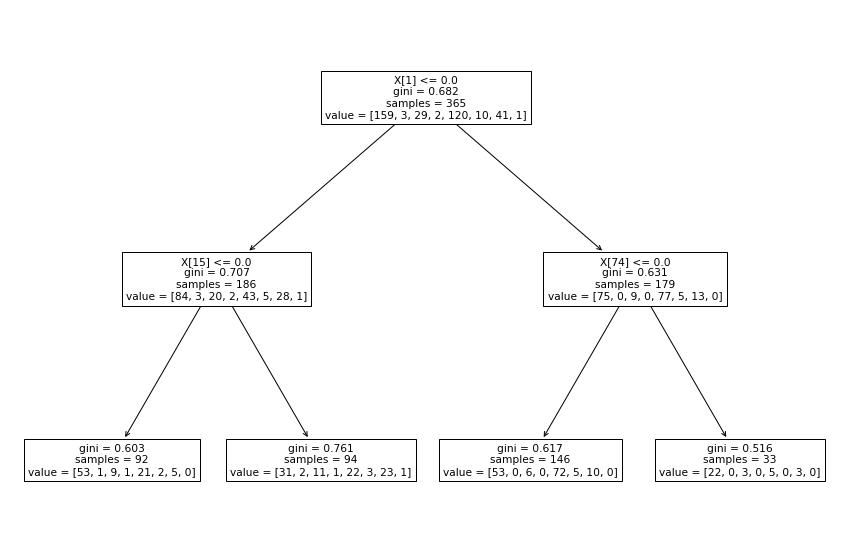

In [24]:
# We plot the decision tree
clf = tree.DecisionTreeClassifier(max_depth=2)
clf = clf.fit(X, Y)
plt.figure(figsize=(15,10))
tree.plot_tree(clf)

The criteria used by the tree

In [25]:
print(X.iloc[:,1].name)
print(X.iloc[:,15].name)
print(X.iloc[:,74].name)

nb_company_business_cendus
nb_clothing,_shoes_and_leather_retail_store_cendus
nb_government_organs_cendus



 - the number of company business (from cendus dataset)
 - the number of clothing, shoes, leather store (from cendus dataset)
 - the number of government organs (from cendus dataset).